In [2]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import missingno as msn # 결측값 시각화를 위한 missingno 라이브러리 임포트
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor

In [3]:
# (1) II. 데이터 셋에서 주어진 특징들을 선택하여 CPU 성능 즉, “PRP” 변수를 예측하는 LinearRegression 기반 다중 선형 회귀 모델링을 프로그래밍 하시오.
# - 데이터 탐색 및 시각화, 전처리, 훈련 데이터와 테스트 데이터 분리, 훈련 데이터 학습과정, 교차 검증, 분석 결과 시각화 등을 포함하여 최적화하는 전체 과정을 포함하시오.

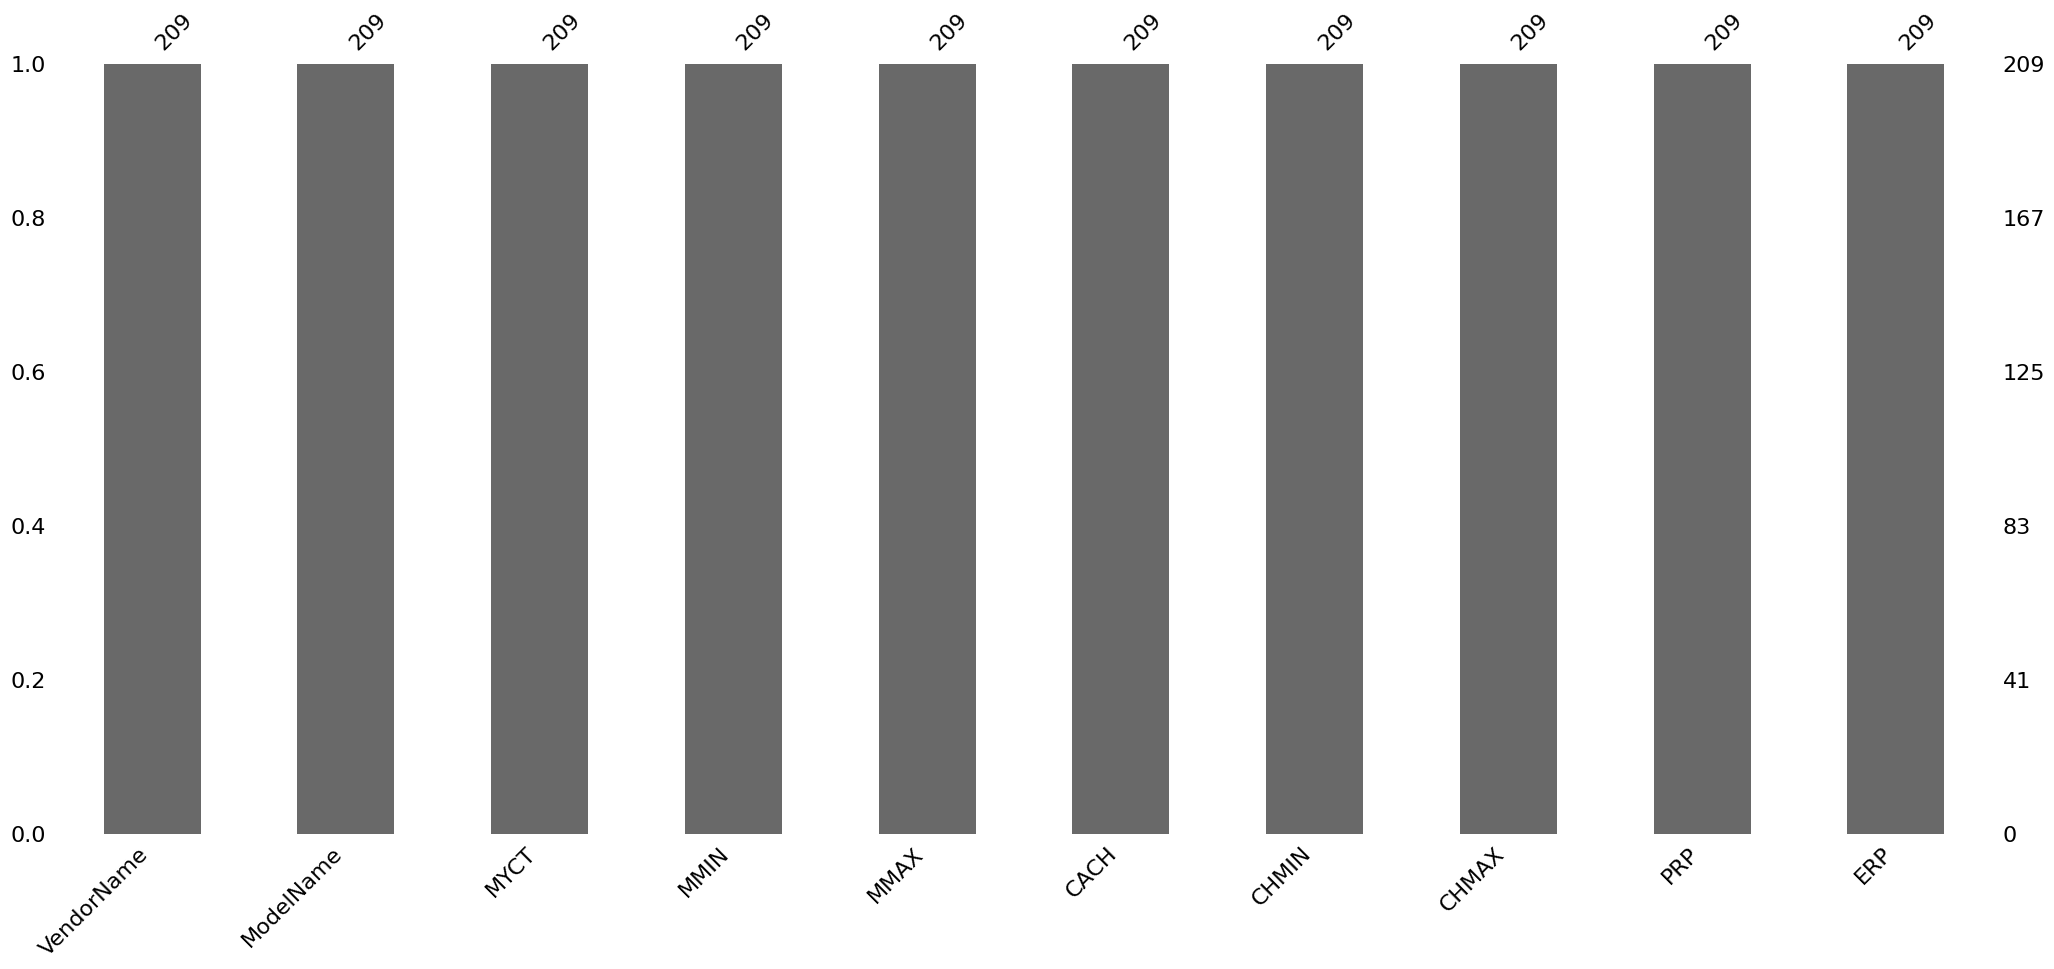

In [4]:
# 1. 데이터 탐색 및 시각화

# 데이터 로드
machine = pd.read_csv("machine.data_update.csv")
machine

# 결측값 찾기
machine.isna().sum() # 데이터프레임에서 결측값이 있는지 확인
msn.bar(machine) # 결측값을 막대 그래프로 시각화하여 결측값의 분포를 확인
machine.dropna(inplace = True) # 결측값이 있는 행을 모두 제거하여 데이터프레임을 정리

In [5]:
#2. 전처리

# 범주형 변수 더미화
dum = pd.get_dummies(machine.VendorName, prefix='vendor', dtype=float) # 더미 변수 생성
machine = pd.concat([machine.drop('VendorName', axis=1), dum], axis=1) # 원래 데이터프레임에서 'VendorName' 열을 제거하고, 더미 변수들과 결합

dum = pd.get_dummies(machine.ModelName, prefix='model', dtype=float) # 더미 변수 생성
machine = pd.concat([machine.drop('ModelName', axis=1), dum], axis=1) # 원래 데이터프레임에서 'VendorName' 열을 제거하고, 더미 변수들과 결합
machine.head()


,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP,vendor_adviser,vendor_amdahl,...,model_v8635,model_v8650,model_v8655,model_v8665,model_v8670,model_vax:11/730,model_vax:11/750,model_vax:11/780,model_vs-100,model_vs-90
0,125,256,6000,256,16,128,198,199,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,8000,32000,32,8,32,269,253,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29,8000,32000,32,8,32,220,253,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29,8000,32000,32,8,32,172,253,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29,8000,16000,32,8,16,132,132,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


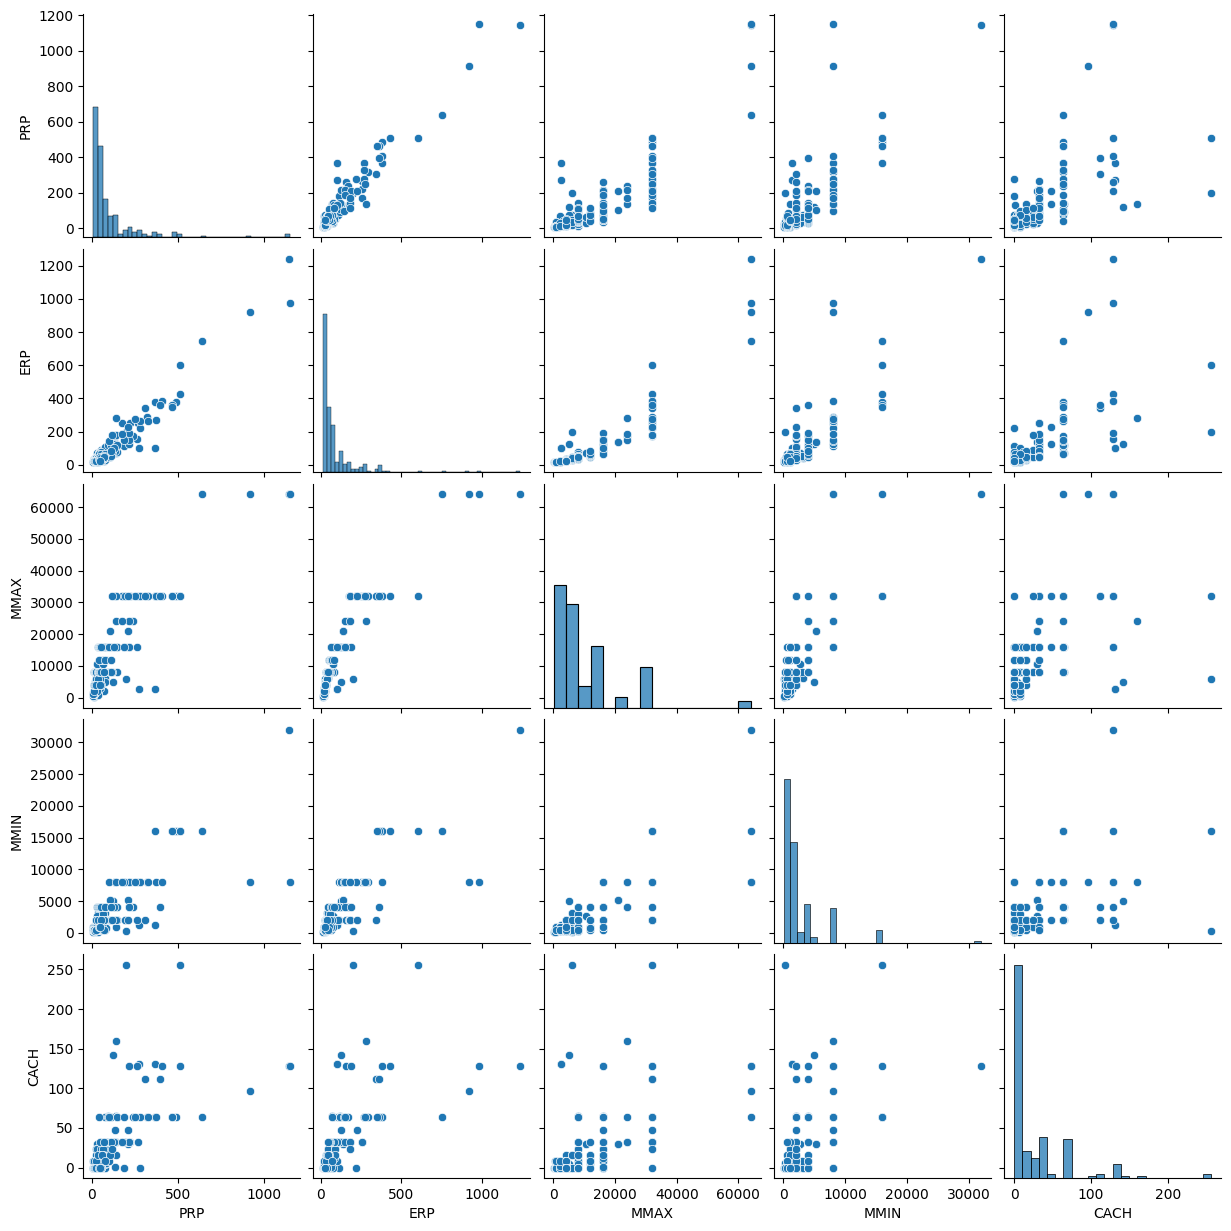

In [11]:
# 1) CPU 성능과 상관도가 높은 4개의 특성 탐색
# (1) CPU 성능('PRP')에 관련된 다른 특성들과의 상관계수 값만을 출력
result = machine.corr()['PRP']


# 상관계수 값을 양의 상관계수로 처리
result = np.abs(result)


# 상관계수를 내림차순으로 정렬하기
result.sort_values(ascending = False).head(10)

# features 선택
features = ['PRP', 'ERP', 'MMAX', 'MMIN', 'CACH']

# seaborn 라이브러리의 CPU 성능과 상관도가 높은 4개의 특성에 대한 쌍 그래프 그리기 --- 대각선 모양의 분포
sns.pairplot(machine[features])
plt.show()

In [12]:
# 2) 데이터 스케일링

# 1) X : 연속형 변수와 범주형 변수 구분
num_features = [ 'ERP', 'MMAX', 'MMIN', 'CACH' ]


# 2) 전처리 파이프라인 설정
numeric_transformer = Pipeline(steps = [
    ('scalar', StandardScaler())
])


preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, num_features)

    ]
)

In [7]:
#훈련 데이터와 테스트 데이터 분리

# X 와 y 설정
X = machine[num_features]
y = machine['PRP']

# X & y 차원 구하기
X.shape, y.shape # ((1649, 5), (1649,))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
#훈련 데이터 학습과정


In [9]:
#교차 검증


In [10]:
#분석 결과 시각화


In [11]:
# (2) (1) 단계에서 얻은 다중 선형 회귀 모델을 사용하여 학습 데이터와 테스트 데이터 각각에 대해 이 모델의 성능을 평가하시오. 
# - Mean squared Error, Mean absolute Error, R^2, 교차검증

In [12]:
# Mean squared Error

In [13]:
# Mean absolute Error

In [14]:
# R^2

In [15]:
# 교차검증

In [16]:
# (3) (2) 단계에서 얻은 모델의 테스트 데이터에 대해 R^2가 90% 이상이 나오도록 모델을 개선하시오.
